## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

In [2]:
#loading data

df = pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# column data type cleanup (Zach)
df.date =  pd.to_datetime(df.date, format='%m/%d/%Y')
df.waterfront.replace({'NO': 0, 'YES': 1}, inplace=True)
df.view.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)
df.condition.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)
df.grade.replace({'3 Poor': 0, '4 Low': 1, '5 Fair': 2, '6 Low Average': 3, '7 Average': 4, '8 Good': 5, 
                  '9 Better': 6, '10 Very Good': 7, '11 Excellent': 8, '12 Luxury': 9, '13 Mansion': 10}, inplace=True)
df.sqft_basement.replace('?', np.NaN, inplace=True)
df.sqft_basement = df.sqft_basement.astype(float)

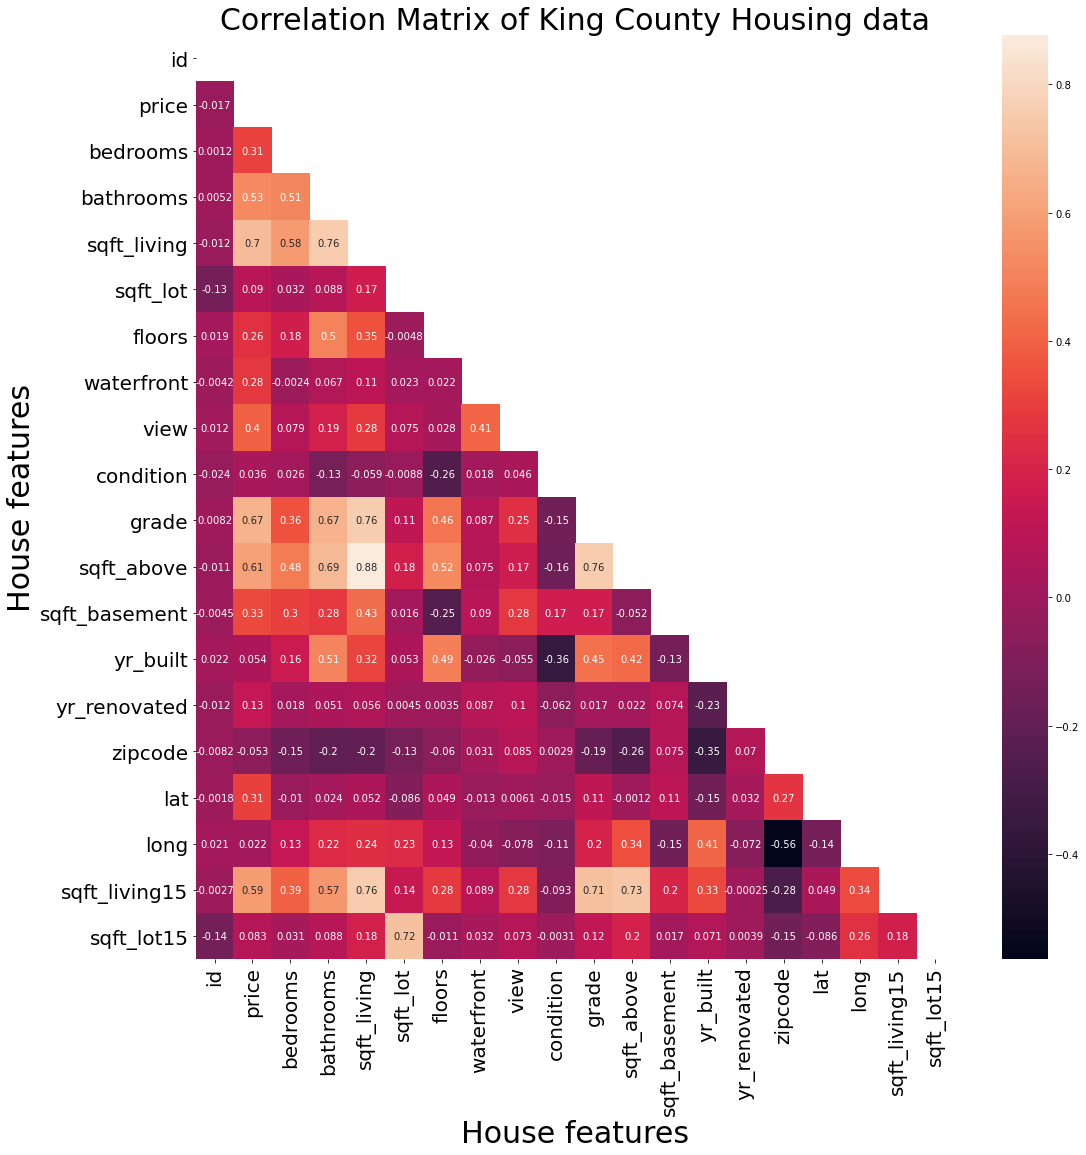

In [5]:


# corr matrix and heatmap
corrMatrix = df.corr()
matrix = np.triu(corrMatrix)

# Put corr matrix in seaborn heat map
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(corrMatrix, annot=True, mask=matrix)
plt.title('Correlation Matrix of King County Housing data', size=30)
plt.xlabel('House features', size=30)
plt.ylabel('House features', size=30)
plt.xticks(size=20)
plt.yticks(size=20);

In [6]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,4,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,4,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,3,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,4,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,5,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,8,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,4,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,4,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,4,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,4,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [8]:
#fill NaN values with 0
df.fillna(0, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,4,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,4,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,3,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,4,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,5,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Insight: Features are related to the actual house and the area in which the house is located. Three models will be built for price: Inferential, Predictive, and a model based upon area.

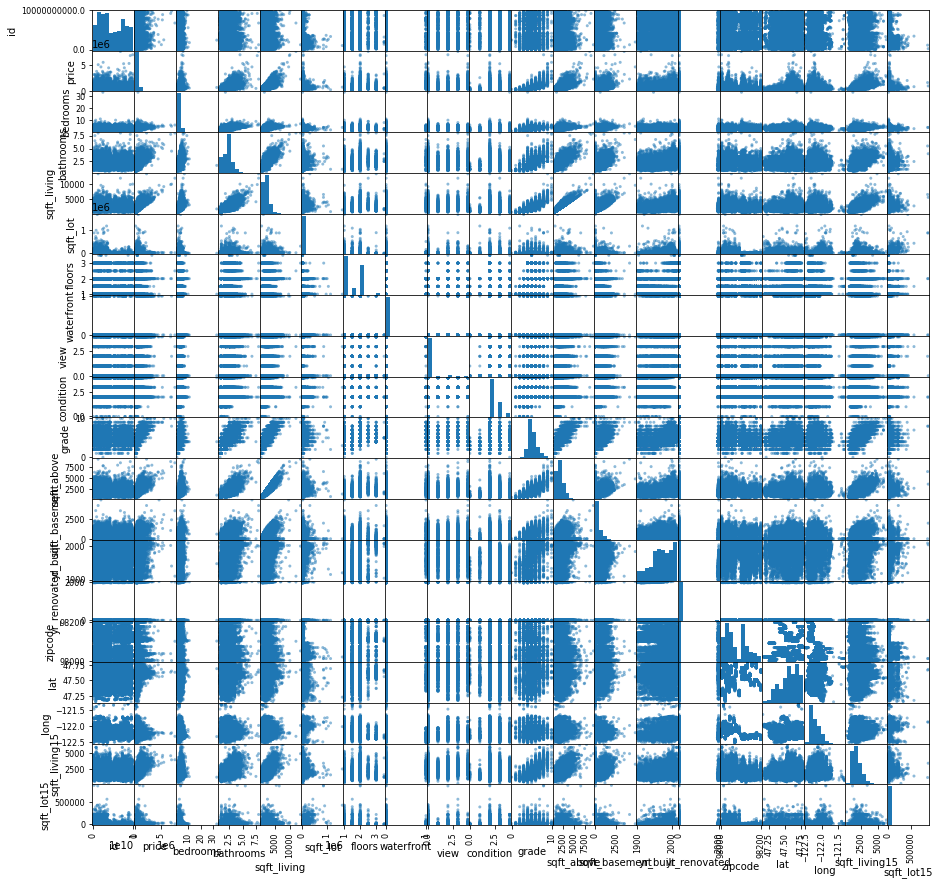

In [9]:
pd.plotting.scatter_matrix(df, figsize=[15, 15]);
plt.savefig('../images/scatter_matrix_AM.png')
plt.show()

In [10]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [11]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


### Insight: sqft_living is also highly correlated with bathrooms, grade, sqft_above, and sqft_living15. These features will be dropped from the predictive model due to collinearity.

## MODEL CREATION (SKLEARN, predictive)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [13]:
y = df[['price']]
X = df.drop(['id', 'price', 'date', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15'], axis=1)


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [15]:
#create dummy regressor as baseline
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
dy_pred = dummy.predict(X_train)
dy_pred_test = dummy.predict(X_test)

In [16]:
dummy.score(X_train, y_train)

0.0

In [17]:
#linear regression model with no feature adjustments
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.6624869705567367

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [19]:
linreg.score(X_test, y_test)

0.6611935531140303

In [20]:
r2_score(y_test, y_pred_test)

0.6611935531140303

In [21]:
RMSE_train = mean_squared_error(y_train, y_pred, squared=False)
RMSE_test = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  210043.12698093805
RMSE for training set is:  214324.32495325204


### QQ plot for sklearn model

INSIGHT: To get a QQ plot for sklearn, we must do y_train - y_pred to calculate residuals. 

In [22]:
y_pred.shape

(17277, 1)

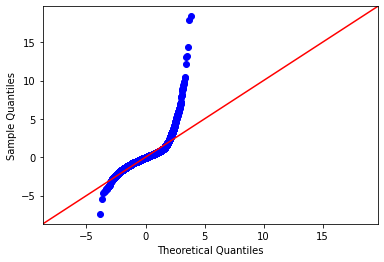

In [23]:
#qq plot of residuals
resid1 = y_train - y_pred

fig = sm.graphics.qqplot(resid1['price'], dist=stats.norm, line='45', fit=True)


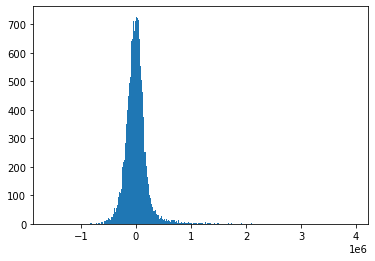

In [24]:
#hist plot of residuals
plt.hist(resid1['price'], bins='auto')
plt.show()

C:\Users\Adonis McQueen\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


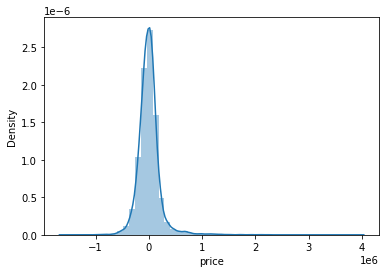

In [25]:
sns.distplot(resid1['price']);

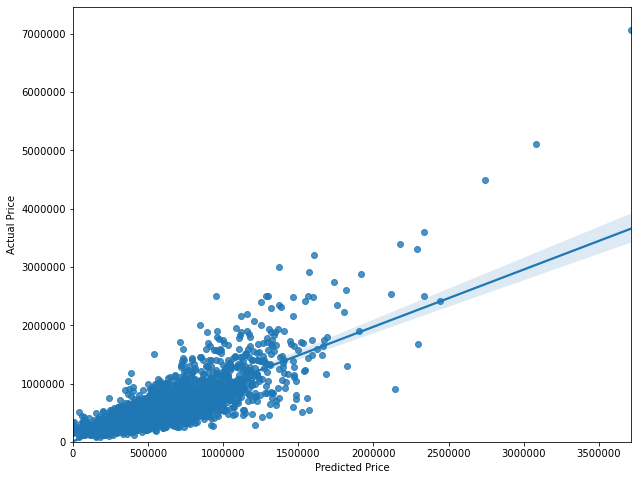

In [60]:
#visualizing predicted price vs actual price
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=y_pred_test, y=y_test, data=df)
ax.set_xlabel("Predicted Price")
ax.set_ylabel("Actual Price")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show();

In [61]:
#examining skew and kurtosis of sklearn model

from scipy.stats import kurtosis, skew
print(skew(resid1))
print(kurtosis(resid1))

[2.93596039]
[31.15108497]


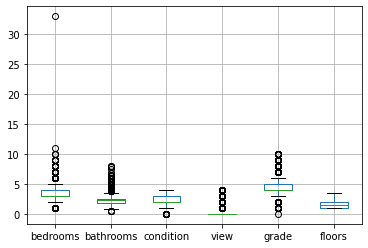

In [28]:
#boxplot of various features to examine outliers
df.boxplot(column = ['bedrooms', 'bathrooms', 'condition', 'view', 'grade', 'floors']);

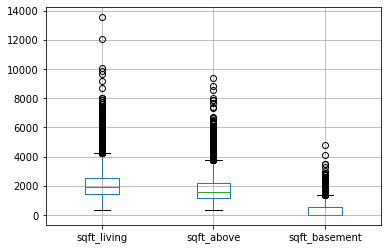

In [29]:
#sqft outliers
df.boxplot(column=['sqft_living', 'sqft_above', 'sqft_basement']);

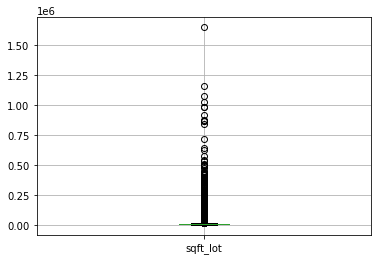

In [30]:
df.boxplot(column='sqft_lot');

### Insight: The model is severely affected by outliers. We will remove the outliers in the data and re-test the model.

In [31]:
#dropping outliers from key features related to the house itself

total_drop = []
for col in ['sqft_living', 'bedrooms', 'sqft_lot', 'sqft_above', 'bathrooms', 'floors']:
    to_drop = np.where(np.abs(stats.zscore(df[col])) > 1.96)[0].tolist()
    total_drop.extend(to_drop)
    
drop_idx = list(set(total_drop))


df2 = df.drop(to_drop)
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,4,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,4,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,3,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,4,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,5,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [32]:
#including all features for model improvement

y1 = df2[['price']]
X1 = df2.drop(['id', 'price', 'date'], axis=1)


In [33]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,
                                                   random_state=42)

In [34]:
linreg = LinearRegression()
linreg.fit(X1_train, y1_train)
y1_pred = linreg.predict(X1_train)
y1_pred_test = linreg.predict(X1_test)

In [35]:
r2_score(y1_test, y1_pred_test)

0.6902065365422633

In [36]:
#RMSE of outlier free model

RMSE_train = mean_squared_error(y1_train, y1_pred, squared=False)
RMSE_test = mean_squared_error(y1_test, y1_pred_test, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  195547.4583437807
RMSE for training set is:  203314.49575459954


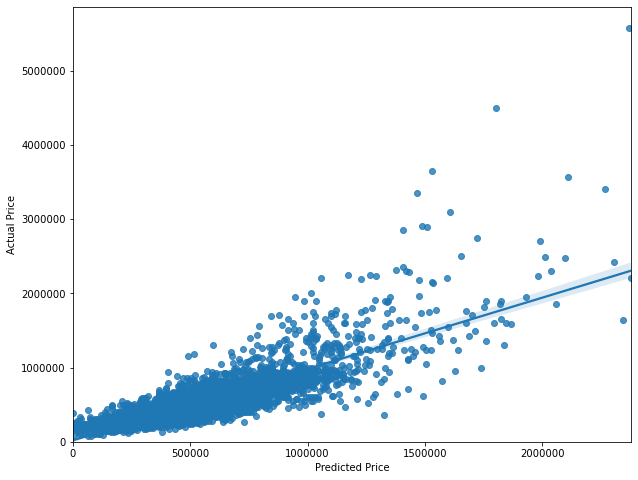

In [37]:
#actual price vs predicted price
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=y1_pred_test, y=y1_test, data=df)
ax.set_xlabel("Predicted Price")
ax.set_ylabel("Actual Price")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.ticklabel_format(useOffset=False, style='plain')
plt.savefig('../images/pred_model_AM.png')
plt.show();

### Insight: removing outliers improved the RMSE overall. Will scaling the features improve the model?

In [38]:
#standard scaler
scaler = StandardScaler()

In [52]:
scaler.fit(X1_train)

StandardScaler()

In [53]:
scaler.transform(X1_train)

array([[-1.48324435, -0.78917715, -1.16811018, ..., -0.97404424,
        -1.42663505, -0.33544689],
       [-0.4121506 , -1.4367002 , -1.21166034, ..., -1.17286864,
        -1.01926358, -0.19794044],
       [-0.4121506 , -0.46541563,  0.36703314, ..., -1.28648258,
         0.20285084, -0.17633017],
       ...,
       [ 0.65894316,  0.50586894,  1.36868693, ...,  0.2047004 ,
         1.06124072, -0.25707265],
       [-0.4121506 ,  0.18210742,  1.05294824, ...,  0.73726575,
         1.5413571 , -0.05381029],
       [-1.48324435, -1.4367002 , -1.34231084, ..., -1.10185993,
        -0.62644109, -0.29119024]])

In [54]:
#create X_train_scaled to store different models

regression = LinearRegression()
regression.fit(scaler.transform(X1_train), y1_train)
regression.score(scaler.transform(X1_test), y1_test)

0.6902065365422553

In [55]:
X_scale_train = scaler.transform(X1_train)
X_scale_test = scaler.transform(X1_test)


In [56]:
y_scale_pred = regression.predict(X_scale_train)
y_scale_testpred = regression.predict(X_scale_test)
y_scale_pred.shape

(16783, 1)

In [57]:
print(r2_score(y1_test, y_scale_testpred))

0.6902065365422553


In [58]:
RMSE_train = mean_squared_error(y1_train, y_scale_pred, squared=False)
RMSE_test = mean_squared_error(y1_test, y_scale_testpred, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  195547.4583437832
RMSE for training set is:  203314.4957545997


### Insight: The model did not improve. Attempting other preprocessing methods

In [46]:
#minmax scaler attempt
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)

MinMaxScaler()

In [47]:
linreg2 = LinearRegression()
linreg2.fit(mmscaler.transform(X_train), y_train)
linreg2.score(mmscaler.transform(X_test), y_test)

0.6611935531140408

In [48]:
X_mmscale_train = mmscaler.transform(X_train)
X_mmscale_test = mmscaler.transform(X_test)

In [49]:
y_mmscale_pred = linreg2.predict(X_mmscale_train)
y_mmscale_testpred = linreg2.predict(X_mmscale_test)

In [50]:
r2_score(y_test, y_mmscale_testpred)

0.6611935531140408

In [51]:
RMSE_train = mean_squared_error(y_train, y_mmscale_pred, squared=False)
RMSE_test = mean_squared_error(y_test, y_mmscale_testpred, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  210043.1269809348
RMSE for training set is:  214324.32495325193


Insight: Despite transformations, standard and minmax scaling, and elimination of outliers, the models still all perform similarly, with varying RMSE between them. This indicates that a predictive linear regression model might not be the most effective model at predicting prices with the given features. The highest performing model is the one free of outliers before scaling and transformation.